# COMP90016 - Exam Part B

## Semester 1, 2020

Version 2. Last edited 22/6/2020.

## Overview

This is an **open book** assessment. While you are undertaking this assessment you **are permitted to**:

- make use of the lecture and workshop material (including soft-copy versions).
- make use of the code that have been part of this subject, including any code that you have written.
- make use of the sample solutions to Assignments.
- make use of the documentation pages for any Python libraries installed on the COMP90016 server (including `skbio` and `pysam`).

While you are undertaking this assessment **you must not**:

- make use of any messaging or communications technology.
- make use of any world-wide web or internet-based resources such as Wikipedia, Stackoverflow, or Google and other search services.
- act in any manner that could be regarded as providing assistance to another student who is undertaking this assessment, or will in the future be undertaking this assessment.

The work you submit **must be based on your own knowledge and skills**, without assistance from any other person.


Part B of the exam is structured similarly to the assignments you have completed for this subject.

The tasks are a combination of writing Python code, and answering written questions.

Make sure you read this entire document, and ask for help on the dedicated LMS discussion thread if anything is unclear. Any changes or clarifications to this document will be announced via the LMS.

You will submit your completed Jupyter notebook file containing all your answers via the LMS. You must also submit an HTML file with the output cleared.

For code questions, you may use the libraries `skbio`, `pysam`, `matplotlib`, `seaborn` and `plotly` as well as standard Python 3 functions and methods. You may also use any other libraries installed on the COMP90016 server including `collections`, `numpy`, `pandas`, `math` and `itertools`. These can be found using help ('modules').

In some cases, we have provided test input and test output that you can use to try out your code. These tests are **not** exhaustive; they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

## Marking

You must enter your answers to each question into the clearly labelled cells. Answers not entered into the correct cell will not be marked.

Some cells are code cells, in which you must wrote code to solve a problem. Others are markdown cells, in which you must write your answers to the questions. Please only add to graded cells, **do not remove or modify any text in graded cells** unless otherwise specified (please don't remove text like this: # ~~ GRADED CELL (1 mark) - complete this cell ~~ ).

>Word limits, where stated, will be strictly enforced! Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. Your code will be tested on the COMP90016 server, so make sure you test your run-times there. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**.

No marks are allocated to commenting in your code. We do however, encourage efficient and well commented code.

**Marks breakdown:**

The total marks for part B of the exam add up to 100.

Part 1: Assembly metrics: 10 marks

Part 2: Variant quality scores: 20 marks

Part 3: Splicing: 20 marks

Part 4: Ontologies: 15 marks

Part 5: Conservation genomics: 35 marks



## Part 1: Assembly metrics
### Setup

A genome assembly can be assessed by using several standard metrics. These can relate to the number and length of contigs, and to the total number of bases in the alignment.

N50 is a metric which is defined as the contig length such that at least 50% of the total nucleotides in the assembly belong to contigs with length greater than or equal to the N50. 

In other words, imagine lining up the contigs in an assembly from longest to shortest. Then progressively add up the lengths of the contigs from the beginning: start with the longest contig + the next longest + the next longest and so on until you reach 50% of the total assembly length. The length of the contig that you stopped at, is the N50.

We begin by importing the an assembly of a genome using `skbio`. The assembly is from an Iris yellow spot virus. We will import this information from a FASTA file that can be downloaded from the LMS. Place this file in the same directory as this notebook. **DO NOT** rename the file. 

In [1]:
# Import the skbio library.
import skbio

In [2]:
# Read in the FASTA file to produce a list of skbio.sequence.DNA objects.
# Each of these objects represents a contig.
assembly_iysv = []
fname = 'comp90016_exam_part_B_assembly.fasta'
registry = skbio.io.read(fname, format = 'fasta')
for c in registry:
    assembly_iysv.append(c)

In [3]:
# Create demo assemblies for test input.
demo_assembly_a = [skbio.sequence.DNA('ACGTTATT'), skbio.sequence.DNA('AGGT'), skbio.sequence.DNA('ACT')]
demo_assembly_b = [skbio.sequence.DNA('GCAGAT'), skbio.sequence.DNA('GAAG'), skbio.sequence.DNA('GCG'), skbio.sequence.DNA('GAT')]


### Questions
In the cells below, complete the following tasks.

1.1. (5 marks, 10 minutes max run-time). Write a Python function that calculates the following metrics from an assembly:
-	Number of contigs
-	Total number of nucleotides in the assembly
-	Average contig length
-	Length of the longest contig
-	N50

Assume assembly is a list of skbio.sequence.DNA objects representing contigs.

Assume each contig has length > 0.

Return a tuple of integers or floating-point numbers representing the metrics in the order that they are listed above.

If assembly is an empty list, return None.


1.2. (5 marks, 50 words max). For an assembly of a SARS-CoV-2 genome, would a high or low value for the following metrics be desired?

-	Number of contigs
-	Average contig length
-	Length of the longest contig
-	N50


In [4]:
# ~~ GRADED CELL 1.1 (5 marks, 10 minutes max run-time) - complete this cell ~~
def assembly_metrics(assembly):
    """
    Calculate the following metrics for an assembly:
    Number of contigs, Total number of nucleotides in the assembly, Average contig length,
    Length of the longest contig, N50.
    Assume assembly is a list of skbio.sequence.DNA objects representing contigs. 
    Assume each contig has length > 0.
    If assembly is an empty list, return None.
    Return a tuple of integers or floating-point numbers representing the metrics
    in the order that they are listed above.
    """
    if not assembly:
        return None

    # number of contig
    contig_num = len(assembly)
    len_list = [len(contig) for contig in assembly]

    # number of bases
    base_num = sum(len_list)

    # average contig length
    average_contig_length = base_num / contig_num

    # max contig length
    max_length = max(len_list)

    # N50
    len_list = sorted(len_list, reverse=True)
    count, n50 = 0, len_list[0]
    for length in len_list:
        count += length
        if count >= base_num / 2:
            n50 = length
            break
    return contig_num, base_num, average_contig_length, max_length, n50

In [5]:
# ~~ Test your function in this cell ~~
print(assembly_metrics(demo_assembly_a)) # should output (3, 15, 5.0, 8, 8)
print(assembly_metrics(demo_assembly_b)) # should output (4, 16, 4.0, 6, 4)

print(assembly_metrics(assembly_iysv))


(3, 15, 5.0, 8, 8)
(4, 16, 4.0, 6, 4)
(12, 16751, 1395.9166666666667, 6080, 2800)


~~ GRADED CELL 1.2 (5 marks, 50 words max) - complete this cell ~~

For an assembly of a SARS-CoV-2 genome, would a high or low value for the following statistics be desired?

-	Number of contigs
-	Average contig length
-	Length of the longest contig
-	N50

A high value would be desired for these statistics, because there might be long repeated region like operons in a virus 
gene, which needs large number of configs and large value of length to do the assembly.

## Part 2: Variant quality scores.

### Setup

Similar to base quality scores in FASTQ files, variant quality scores are encoded within VCF files. These scores are found in the QUAL field.

First we will import two VCF files using `pysam`. The VCF files can be downloaded from the LMS. Place these files in the same directory as this notebook. **DO NOT** rename the files.

In [6]:
# Import the VariantFile function.
from pysam import VariantFile

In [7]:
# Read in the VCF files to produce VariantFile objects.
demo_vcf = VariantFile("comp90016_exam_part_B_demo.vcf")
exam_vcf = VariantFile("comp90016_exam_part_B.vcf")

### Questions

In the cells below, complete the following tasks:

2.1. (10 marks, 10 minutes max run-time). Write Python code that will produce a histogram of the variant quality scores in the exam_vcf file. Choose an appropriate bin width. Assume that every variant in the VCF file has an associated variant quality score that is greater than or equal to 0. Make sure you use a plotting library that is available on the COMP90016 server (`matplotlib`, `seaborn` and `plotly` are good options). See the solutions to workshop 4 for a hint as to how to produce a histogram using `matplotlib`. The input is exam_vcf, a pysam VariantFile object. Your code can be a single function, multiple functions or code not contained within a function.

An example histogram using the variant quality scores from the demo VCF file is shown below.

<img src="demo_histogram.png">

2.2. (10 marks, 50 words max). Explain how depth and base quality scores can influence variant quality scores.


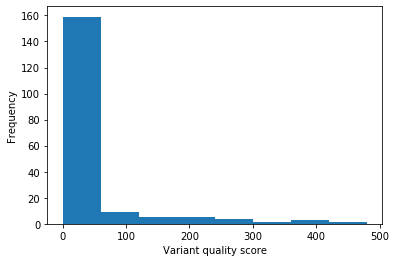

In [8]:
# ~~ GRADED CELL 2.1 (10 marks, 10 minutes max run-time) - complete this cell ~~

import matplotlib.pyplot as plt
def generate_histogram(vcf):
    quality_list = []
    for variant in vcf.fetch():
        quality_list.append(variant.qual)
    
    plt.hist(quality_list, density=False, bins=range(0, int(max(quality_list)) + 60, 60))
    plt.ylabel('Frequency')
    plt.xlabel('Variant quality score')
    plt.show()

generate_histogram(exam_vcf)

~~ GRADED CELL 2.2 (10 marks, 50 words max) - complete this cell ~~

Explain how depth and base quality scores can influence variant quality scores.

The variant quality scores are calculated by adding the base quality scores of the reads that cover this variant position,
therefore a higher read depth and higher base quality scores result in a higher variant quality score.

## Part 3: Splicing

### Setup

In many eukaryotic genes, introns are removed from pre-mRNA before the transcript is translated. This is called RNA splicing. Only the exons of genes are translated.

We use the `skbio` library again to import a gene sequence from a FASTA file that can be downloaded from the LMS. Place this file in the same directory as this notebook. **DO NOT** rename the file.

In [9]:
# Read in the gene sequence from a FASTA file to produce a skbio.sequence.DNA object.
fname = 'comp90016_exam_part_B_gene.fasta'
registry = skbio.io.read(fname, format = 'fasta')
for seq in registry:
    gene_sequence = skbio.sequence.DNA(seq)
    
# Create a demo sequence.
seq = 'CGTTGATGTATTGGCCGTAACATTGAGTGACGACGAGTAGGG'
demo_sequence = skbio.sequence.DNA(seq)

### Questions

In the cells below, complete the following tasks:

3.1. (10 marks, 10 minutes max run-time). Write a Python function that will translate only the exons of a DNA sequence. Assume seq is a skbio.sequence.DNA object. Assume exon_boundaries is a list of tuples, containing the positions of the first and last nucleotides of the exons (the first nucleotide is position 1). Use the standard genetic code. Return a skbio.sequence.Protein object. If either seq or exons are of length 0, return None.

3.2. (10 marks, max 50 words). DNA sequences at splice sites are generally highly conserved. Most commonly, there is a GT at the 3' end of an intron and an AG at the 5’ end. Describe one possible consequence if a mutation occurred in either of these conserved sequences in a splice site of a protein coding gene.


In [10]:
# ~~ GRADED CELL 3.1 (10 marks, 10 minutes max run-time) - complete this cell ~~
def translate_exons(seq, exons):
    """
    Translate only the exons of a DNA sequence.
    Assume seq is a skbio.sequence.DNA object. 
    Assume exons is a list of tuples, containing the positions of the first and last nucleotides of the exons
    (the first nucleotide is position 1). 
    Use the standard genetic code.
    Return a skbio.sequence.Protein object.
    If either seq or exons are of length 0, return None.
    """
    from skbio import GeneticCode
    protein_str = ""
    for start, end in exons:
        protein_str += str(seq[start - 1:end])
    protein_coding_seq = skbio.sequence.DNA(protein_str)
    return protein_coding_seq.translate(stop='require')

In [11]:
# ~~ Test your function in this cell ~~
# seq = 'CGTTGATGTATTGGCCGTAACATTGAGTGACGACGAGTAGGG'
print(translate_exons(demo_sequence, [(6, 16), (28, 40)])) # should output the sequence MYWPDDE

print(translate_exons(gene_sequence, [(211, 397), (3824, 3960)]))


MYWPDDE
MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN


~~ GRADED CELL 3.2 (10 marks, max 50 words) - complete this cell ~~

DNA sequences at splice sites are generally highly conserved. Most commonly, there is a GT at the 3' end of an intron and an AG at the 5’ end. Describe one possible consequence if a mutation occurred in either of these conserved sequences in a splice site of a protein coding gene.

A substition at the 3'end of the intron may causes the 3' splice site shift to somewhere in the middle of the intron that has a 'GT', as a result, part of this intron will be transcribed into the mRNA and change the protein function.


## Part 4: Ontologies

### Setup

Enrichment analysis can be performed to determine whether a set of entities (eg. gene symbols) is enriched for particular categories in an ontological database. Note that the database categories can be overlapping or nested as a hierarchy.

A background frequency associated with a database category is calculated by dividing the total number of entities in the database category by the total number of entities in the database.

A sample frequency associated with a database category is calculated by dividing the number of entities in the category in the input data set by the total number of entities in the input data set.

For the following questions, we will define an enriched category as one with a sample frequency greater than the background frequency.

For example, if the input data set contains 24 gene symbols and if 7 out of the 24 gene symbols belong to the database category “lipid metabolism”, then the sample frequency for “lipid metabolism” is 7/24. If there are 79 genes classified under the “lipid metabolism” category in an ontological database containing 8000 genes, then the background frequency for “lipid metabolism” will be 79/8000. Because the sample frequency is greater than the background frequency, “lipid metabolism” is enriched in the data set.

We create a database dictionary from a text file that can be downloaded from the LMS. Place this file in the same directory as this notebook. **DO NOT** rename the file.

In [12]:
# Read in the database information from a text file to produce a dictionary.
ontology_database = {}
db = open("comp90016_exam_part_B_database.txt")
for category in db:
    (category_name, entities) = category.split(":")
    entities = entities[:-1].split()
    ontology_database[category_name] = entities
    
# Create a list of gene symbols.    
gene_list = ['BD2S', 'CAT3', 'G95L', 'DCBP', '2UG2', 'CS8K', 'L9K7', '3DB6', 'TCSI', 'RU63', 'RL3L', 'LACB', 'ACAB', 'P1RG', '96L7', 'BLM1', 'CI2K', '7A2L', 'I15O', '7P83', 'K1RO', '16AS', 'RBLG', '6B5T', '2DDT']


### Questions

In the cells below, complete the following tasks:

4.1. (10 marks, 10 minutes max run-time). Write a Python function to identify the enriched categories from a list of gene symbols. Assume symbols is a list of gene symbols as strings. Assume database is a dictionary with strings representing category names as keys and lists of strings representing gene symbols as values. Return a list of the category names that are enriched. If no categories are enriched, return an empty list. If either symbols or database are of length 0, return None.

4.2. (5 marks, 50 words max). Explain one advantage of a hierarchical structure in an ontological database.


In [13]:
# ~~ GRADED CELL 4.1 (10 marks, 10 minutes max run-time) - complete this cell ~~
def enrichment_analysis(symbols, database):
    """
    Identify the enriched categories from a list of gene symbols.
    Assume symbols is a list of gene symbols as strings.
    Assume database is a dictionary with strings representing category names as keys
    and lists of strings representing gene symbols as values.
    Return a list of the category names that are enriched.
    If no categories are enriched, return an empty list.
    If either symbols or database are of length 0, return None.
    """
    result = []
    db_genes = set()
    for genes in database.values():
        for gene in genes:
            db_genes.add(gene)
    
    for cat, genes in database.items():
        count = len([symbol for symbol in symbols if symbol in genes])
        sample_fre = count / len(genes)
        bg_fre = len(genes) / len(db_genes)
        if sample_fre > bg_fre:
            result.append(cat)
    return result

In [14]:
# ~~ Test your function in this cell ~~
print(enrichment_analysis(['BA28', 'D0TE', '7AOT'], {'cat1': ['BA28', 'D0TE', 'LILB'], 'cat2': ['MKAO', '7AOT', 'SPUC']})) # should output ['cat1']

print(enrichment_analysis(gene_list, ontology_database))


['cat1']
['bacteriocin-catabolic-process', 'gliotoxin-catabolic-process', 'pigmentation', 'cuticle-pigmentation', 'eye-pigmentation', 'anaphase', 'telophase']


~~ GRADED CELL 4.2 (5 marks, max 50 words) - complete this cell ~~

Explain one advantage of a hierarchical structure in an ontological database.

A search result is produced by traversing a pathway of tree structure instead of scanning the entire database, which reduces the searching complexity.


## Part 5: Conservation Genomics
### Setup

Conservation Biologists are investigating recent reliable reports of sightings of a Snark on a remote uninhabited island. Until now it had been thought that Snarks had been hunted to extinction at the end of the 19th Century, with the last reported expedition to locate them being unsuccessful. This expedition was documented in a 1872 report by Charles Dodgson.
 
The Snark is known to be similar in appearance to a closely related species known as a Boojum, which has a thriving population on a nearby island. However, little is known about the appearance, diet or social structure of Snark communities.
 
Available resources:
-  	The Snark genome has not been sequenced but the Boojum genome sequence and associated annotation file is publicly available.
-  	A nearby museum maintains a collection of a small number of well-preserved authentic Snark hides and bones, from which DNA has been successfully extracted.
-  	Researchers have successfully extracted DNA samples from recently collected scat and fur samples from the island. These are thought to have come from Snarks.
 
Researchers are keen to confirm the existence of a live population of Snarks on the island and learn more about this elusive species so that the habitat can be managed in a way that supports the long term survival of the species.

### Questions
Answer the questions below based on the scenario above. 

- Answer the questions in the order that they are presented.
- Answer in text format only, do not include figures or code. 
- Limit your discussion to aspects of the bioinformatics.  You can assume that the DNA and RNA extracted by the biologists are of sufficient quality and quantity for the analysis you propose.
- Describe all necessary steps in the analysis pipeline.
- You should include details such as; choice of sequencing technology, accepted data standards that should be met, anticipated quality control issues and their management, names of software tools employed at each step, validation steps, and the expected results for different potential outcomes.
 
5.1 (20 marks, 300 words max).
Using the information and resources from the scenario above, describe an experimental approach that could confirm if Snarks are currently living on the island.
 
5.2 (15 marks, 300 words max).
Some time has passed since your original analysis confirmed a healthy population of Snarks on the island.  Unfortunately, the population has recently crashed due to the introduction of disease to the island. However, researchers have determined that some animals seem to be resistant to the disease. In an effort to understand more about the disease and how to treat the animals they have extracted total RNA from blood samples collected from 20 disease affected and 20 disease resistant animals. 

Using the resources above, and any additional bioinformatics resources you generated during question 1, describe a bioinformatics analysis workflow to identify genes that are differentially expressed in disease affected animals.


~~ GRADED CELL 5.1 (20 marks, 300 words max) - complete this cell ~~

Using the information and resources from the scenario above, describe an experimental approach that could confirm if Snarks are currently living on the island.
* use PCR to amplify the genome extracted from scat and fur with primers for 18s rRNA genes, 
* use Illumina to generate demultiplexed readsets for 18s rRNA genes of the samples.
* trim primers and adaptors using trimmomatic
* verify the read quality using FastQC, remove short reads and truncate poor quality bases.
* use DADA2 to do ASV binning
* use Silva database with the Snark DNA extracted from hidesand bones and the ASV as the query to do species level taxonomy classification, and verify whether the sample extracted from scat and fur is from Snark.

~~ GRADED CELL 5.2 (15 marks, 300 words max) - complete this cell ~~

Some time has passed since your original analysis confirmed a healthy population of Snarks on the island.  Unfortunately, the population has recently crashed due to the introduction of disease to the island. However, researchers have determined that some animals seem to be resistant to the disease. In an effort to understand more about the disease and how to treat the animals they have extracted total RNA from blood samples collected from 20 disease affected and 20 disease resistant animals. 

Using the resources above, and any additional bioinformatics resources you generated during question 1, describe a bioinformatics analysis workflow to identify genes that are differentially expressed in disease affected animals.

* use oligo dT purification to do rRNA deduction to the RNA samples of disease affeacted and disease resistant animals respectively.
* reverse transcibe the mRNA to cDNA, and apply PCR amplification to the cDNA
* use Illumina NGS to generate readsets, and use FastQC to do quality control
* perform de novo assembly to generate contigs for disease affected and disease resistant genome respectively.
* use GATK to analyse the variants between disease affected and disease resistant genome to identify the genes that are differentially expressed.